In [54]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import missingno as msn
import matplotlib.pyplot as plt
import seaborn as sns


import warnings
warnings.filterwarnings('ignore')
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.metrics import classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

In [4]:
df=pd.read_csv('adult.csv', na_values=['?'])

In [5]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [6]:
df.shape

(32561, 15)

In [7]:
df['native.country'].value_counts()

United-States                 29170
Mexico                          643
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France                      

In [8]:
df['native.country'].value_counts(normalize=True)

United-States                 0.912190
Mexico                        0.020108
Philippines                   0.006192
Germany                       0.004284
Canada                        0.003784
Puerto-Rico                   0.003565
El-Salvador                   0.003315
India                         0.003127
Cuba                          0.002971
England                       0.002814
Jamaica                       0.002533
South                         0.002502
China                         0.002345
Italy                         0.002283
Dominican-Republic            0.002189
Vietnam                       0.002095
Guatemala                     0.002001
Japan                         0.001939
Poland                        0.001876
Columbia                      0.001845
Taiwan                        0.001595
Haiti                         0.001376
Iran                          0.001345
Portugal                      0.001157
Nicaragua                     0.001063
Peru                     

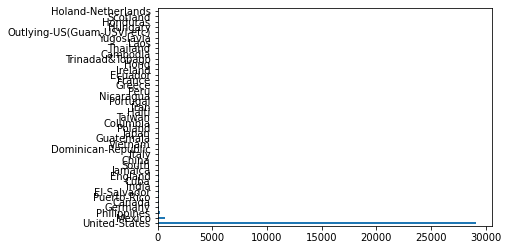

In [9]:
df['native.country'].value_counts().plot.barh()

In [10]:
df=df[df['native.country']=='United-States']

In [11]:
df.shape

(29170, 15)

In [12]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,NaN,77053,HS-grad,9,Widowed,NaN,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,NaN,186061,Some-college,10,Widowed,NaN,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [13]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,29170.0,38.655674,13.722408,17.0,28.00,37.0,48.0,90.0
fnlwgt,29170.0,187069.021152,104877.981749,12285.0,115895.25,176730.0,234138.5,1484705.0
education.num,29170.0,10.169455,2.394966,1.0,9.00,10.0,12.0,16.0
capital.gain,29170.0,1089.229928,7381.898528,0.0,0.00,0.0,0.0,99999.0
capital.loss,29170.0,88.510593,405.681709,0.0,0.00,0.0,0.0,4356.0
hours.per.week,29170.0,40.447755,12.417203,1.0,40.00,40.0,45.0,99.0


In [14]:
df.isnull().sum()

age                  0
workclass         1659
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1666
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country       0
income               0
dtype: int64

In [15]:
df.isnull().sum()/df.shape[0]

age               0.000000
workclass         0.056874
fnlwgt            0.000000
education         0.000000
education.num     0.000000
marital.status    0.000000
occupation        0.057113
relationship      0.000000
race              0.000000
sex               0.000000
capital.gain      0.000000
capital.loss      0.000000
hours.per.week    0.000000
native.country    0.000000
income            0.000000
dtype: float64

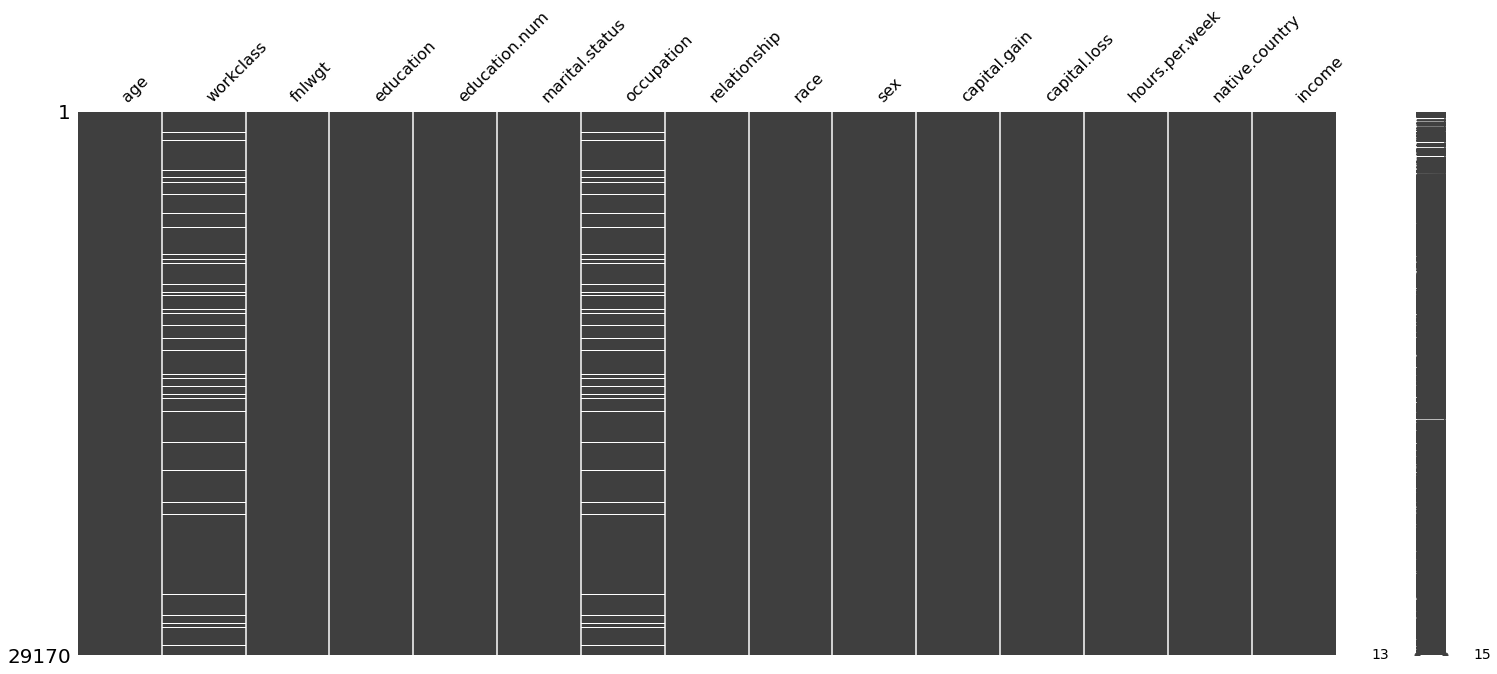

In [16]:
msn.matrix(df)

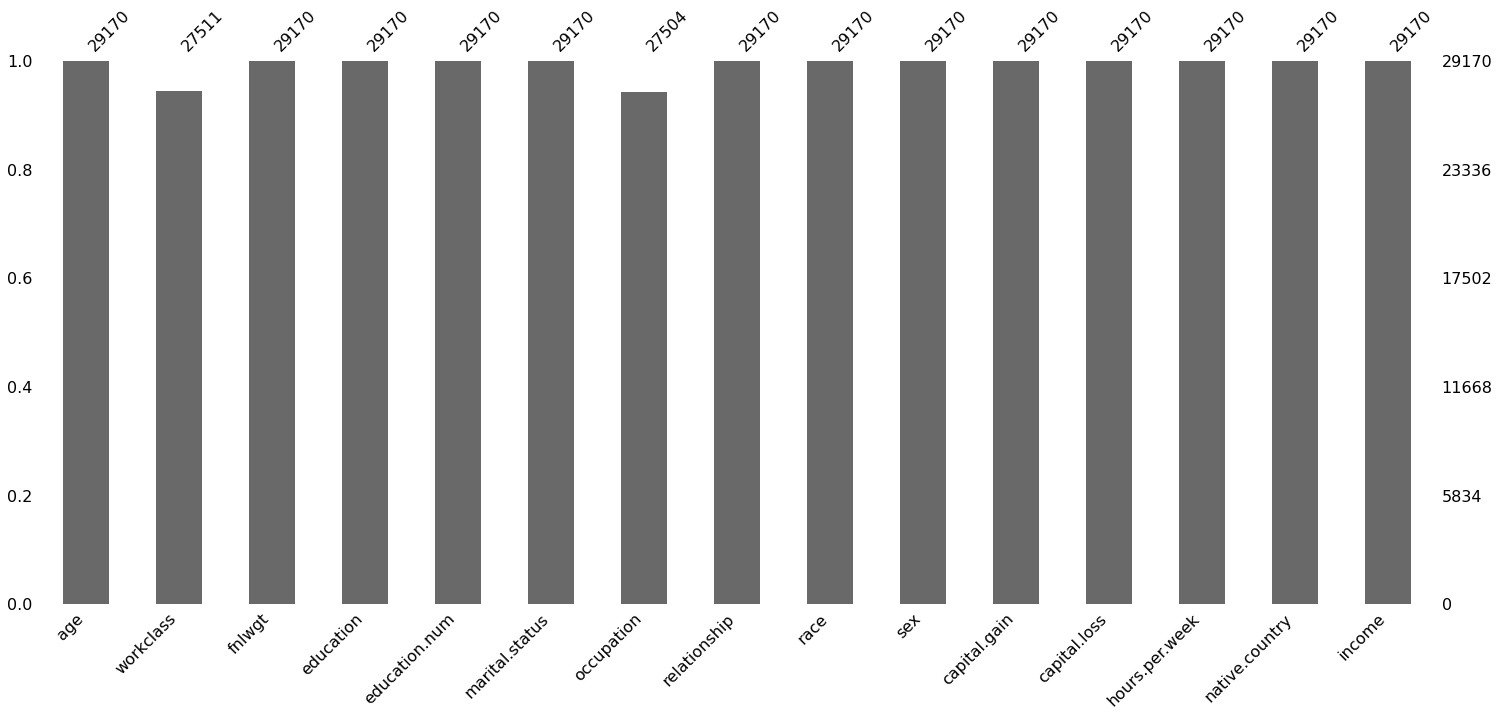

In [17]:
msn.bar(df)

In [18]:
numeric_cols=df._get_numeric_data().columns

print(numeric_cols)

Index(['age', 'fnlwgt', 'education.num', 'capital.gain', 'capital.loss',
       'hours.per.week'],
      dtype='object')


In [19]:
categoric_cols=list(set(df.columns)-set(numeric_cols))

print(categoric_cols)

['native.country', 'education', 'workclass', 'sex', 'marital.status', 'race', 'occupation', 'relationship', 'income']


In [20]:
for col in numeric_cols:
    df[col]=df[col].fillna(df[col].median())

In [21]:
for col in categoric_cols:
    df[col]=df[col].fillna(df[col].mode()[0])

In [22]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [23]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,Private,186061,Some-college,10,Widowed,Exec-managerial,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [24]:
df['race'].value_counts()

White                 25621
Black                  2832
Amer-Indian-Eskimo      296
Asian-Pac-Islander      292
Other                   129
Name: race, dtype: int64

In [25]:
df['race'].value_counts(normalize=True)

White                 0.878334
Black                 0.097086
Amer-Indian-Eskimo    0.010147
Asian-Pac-Islander    0.010010
Other                 0.004422
Name: race, dtype: float64

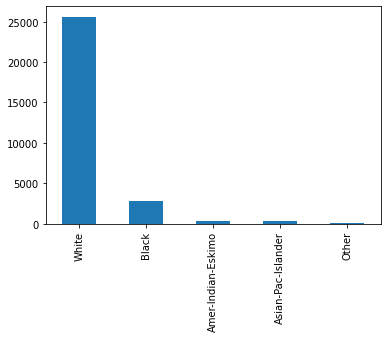

In [26]:
df['race'].value_counts().plot.bar()

In [27]:
#white olanlar 87 fazidi coxu deye ,digerleri umulikde 13 faizdi azdi deye silirik digerlerini ancaq white saxlayiiriq.
df=df[df['race']=='White']

In [28]:
df.shape

(25621, 15)

In [29]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K


In [30]:
df['sex'].value_counts()

Male      17653
Female     7968
Name: sex, dtype: int64

In [31]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,25621.0,38.809375,13.809187,17.0,28.0,37.0,48.0,90.0
fnlwgt,25621.0,183899.882830,101440.022003,18827.0,114955.0,175653.0,229364.0,1484705.0
education.num,25621.0,10.253737,2.401335,1.0,9.0,10.0,13.0,16.0
capital.gain,25621.0,1152.582764,7636.047329,0.0,0.0,0.0,0.0,99999.0
capital.loss,25621.0,93.249951,416.191650,0.0,0.0,0.0,0.0,4356.0
hours.per.week,25621.0,40.714609,12.616284,1.0,40.0,40.0,45.0,99.0


In [32]:
df['workclass'].value_counts()

Private             19126
Self-emp-not-inc     2190
Local-gov            1632
State-gov            1023
Self-emp-inc          959
Federal-gov           674
Without-pay            12
Never-worked            5
Name: workclass, dtype: int64

In [33]:
df['workclass'].value_counts(normalize=True)

Private             0.746497
Self-emp-not-inc    0.085477
Local-gov           0.063698
State-gov           0.039928
Self-emp-inc        0.037430
Federal-gov         0.026307
Without-pay         0.000468
Never-worked        0.000195
Name: workclass, dtype: float64

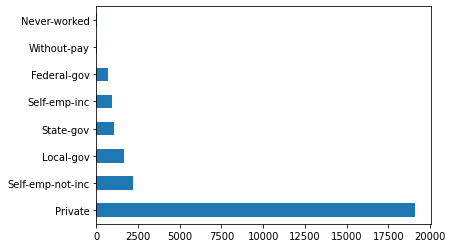

In [34]:
df['workclass'].value_counts().plot.barh()

# Outliers

In [36]:
def outliers_bounds(df, col):
    Q1=df[col].quantile(0.25)
    Q3=df[col].quantile(0.75)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    return lower_bound, upper_bound

In [37]:
def outliers_remove(df, col):
    res=outliers_bounds(df, col)
    l_b, u_b=res[0], res[1]
    return df[ (df[col]>l_b) & (df[col]<u_b) ]

In [38]:
def outliers_band(df, col):
    l, u=outliers_bounds(df, col)
    df.loc[ (df[col]<l), col]=l
    df.loc[ (df[col]>u), col]=u
    return df

In [39]:
data=df.copy()

In [40]:
df.shape

(25621, 15)

In [41]:
data.shape

(25621, 15)

In [42]:
data.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K


In [43]:
for col in numeric_cols:
    data=outliers_remove(data, col)

In [44]:
data.shape

(0, 15)

In [45]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,HS-grad,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K


In [46]:
df.drop('education', axis=1, inplace=True)

In [47]:
df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,<=50K


In [48]:
df['income']=df['income'].map(lambda setir: 0 if setir=='<=50K' else 1)

In [49]:
df.head()

,age,workclass,fnlwgt,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Private,77053,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
3,54,Private,140359,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
5,34,Private,216864,9,Divorced,Other-service,Unmarried,White,Female,0,3770,45,United-States,0


In [50]:
df=pd.get_dummies(df, drop_first=True)

In [51]:
df.head()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week,income,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,occupation_Protective-serv,occupation_Sales,occupation_Tech-support,occupation_Transport-moving,relationship_Not-in-family,relationship_Other-relative,relationship_Own-child,relationship_Unmarried,relationship_Wife,sex_Male
0,90,77053,9,0,4356,40,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1,82,132870,9,0,4356,18,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
3,54,140359,4,0,3900,40,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
4,41,264663,10,0,3900,40,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
5,34,216864,9,0,3770,45,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0


# Model

In [52]:
X=df.drop('income', axis=1)
Y=df['income']

In [53]:
def build_model(algo, X, Y, r_s=42, t_s=0.33):
    X_train, X_test, Y_train, Y_test=train_test_split(X, Y, random_state=r_s, test_size=t_s, stratify=Y)
    
    model=algo()
    model.fit(X_train, Y_train)
    
    Y_pred=model.predict(X_test)
    
    print(type(model).__name__)
    
    print(classification_report(Y_test, Y_pred))

In [55]:
models=[LogisticRegression, DecisionTreeClassifier, KNeighborsClassifier, RandomForestClassifier, SVC, MLPClassifier]


In [56]:
for m in models:
    build_model(m, X, Y)

LogisticRegression
              precision    recall  f1-score   support

           0       0.79      0.96      0.87      6243
           1       0.72      0.27      0.40      2212

    accuracy                           0.78      8455
   macro avg       0.76      0.62      0.63      8455
weighted avg       0.77      0.78      0.74      8455

DecisionTreeClassifier
              precision    recall  f1-score   support

           0       0.87      0.86      0.86      6243
           1       0.61      0.62      0.62      2212

    accuracy                           0.80      8455
   macro avg       0.74      0.74      0.74      8455
weighted avg       0.80      0.80      0.80      8455

KNeighborsClassifier
              precision    recall  f1-score   support

           0       0.79      0.90      0.84      6243
           1       0.54      0.31      0.40      2212

    accuracy                           0.75      8455
   macro avg       0.66      0.61      0.62      8455
weighted av